In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
td = pd.read_csv('diabetes.csv')

In [3]:
td.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
td.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## DATA VISUALIZATION

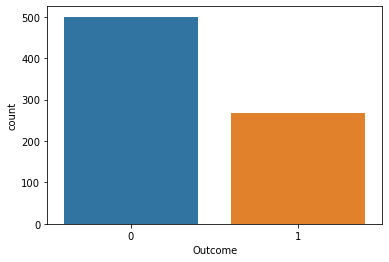

In [5]:
sns.countplot(x = 'Outcome', data = td)

## MODEL BUILDING 

In [6]:
X = td.drop('Outcome', axis = 1)
y = td['Outcome']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 10)

### Now we choose optimal value of k ( which is generallt sqrt(n) and odd) but in this case we will compare accuracy of all k from 1  to sqrt(n) and get optimal value of k

In [9]:
# make array to store accuracy for each k 

siz = int(len(td) ** 0.5)   # max optimal value is till sqrt(n) , n = size of dataset

if siz % 2 == 0 : siz += 1 # if siz is even we make it odd
    
k_val = np.arange(1, siz)  # for storing k values 

accuracy = np.arange(1, siz, dtype = 'float') # for storing accuracy for each k 

In [10]:
for i in k_val :
    model = KNeighborsClassifier(n_neighbors = i)
    
    model.fit(X_train , y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy[i - 1] = accuracy_score(y_test, y_pred)
    print(accuracy[i -1])

0.6654275092936803
0.6988847583643123
0.6914498141263941
0.7137546468401487
0.7026022304832714
0.7211895910780669
0.7100371747211895
0.7211895910780669
0.7323420074349443
0.7211895910780669
0.7100371747211895
0.724907063197026
0.7174721189591078
0.7323420074349443
0.7211895910780669
0.7286245353159851
0.7063197026022305
0.7137546468401487
0.7026022304832714
0.7063197026022305
0.7100371747211895
0.7063197026022305
0.6988847583643123
0.7026022304832714
0.7063197026022305
0.6951672862453532


## PLOTING GRAPH  OF k versus Accuracy 

In [11]:
print(k_val.shape, accuracy.shape)

(26,) (26,)


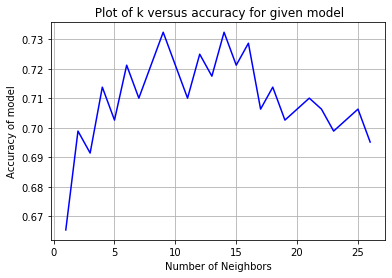

Max accuracy is 0.7323420074349443 at k = 9


In [12]:
plt.plot(k_val, accuracy, c = 'b', label = 'Accuracy')
plt.ylabel('Accuracy of model')
plt.xlabel('Number of Neighbors')
plt.grid(True)
plt.title(' Plot of k versus accuracy for given model')
plt.show()

 
max_accuracy = max(accuracy)  # Find the maximum accuracy value
max_k = k_val[accuracy.argmax()]  # Find the k value corresponding to the maximum accuracy
print("Max accuracy is " + str(max_accuracy) + " at k = "+  str(max_k))


Text(0.5, 257.44, 'Predicted label')

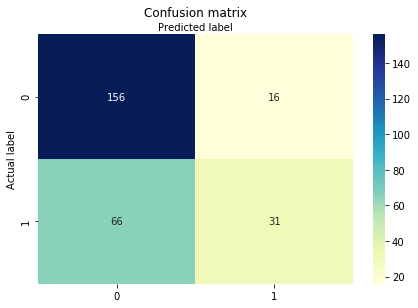

In [13]:
# confusion matrix for model 
cnf = confusion_matrix(y_test, y_pred)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Plotting ROC curve 


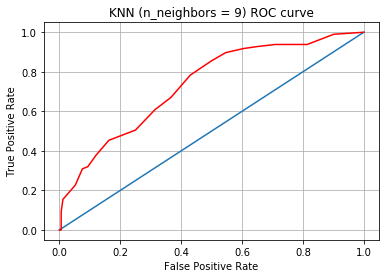

In [14]:
y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,c ='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN (n_neighbors = 9) ROC curve')
plt.grid(True)
plt.show()

In [15]:
print("Area under Roc Curve = " + str(roc_auc_score(y_test, y_prob) * 100)  + " % ")

Area under Roc Curve = 73.31275473507553 % 
